In [12]:
import platform, sys, os

# Install WorkingWithFiles
To install WorkingWithFiles go to next link https://github.com/trucomanx/WorkingWithFiles


# Variables

In [13]:
## Seed for the random variables
seed_number=0;

## Model of network
#model_type = 'mobilenet_v3';
model_type = 'efficientnet_b3'
#model_type = 'inception_v3';
#model_type = 'inception_resnet_v2';
#model_type = 'resnet_v2_50';

#DATASET_NAME = 'fer2013';
DATASET_NAME = 'mcfer_v1.0';

times=1;

categories=['angry','disgusted','fearful','happy','neutral','sad','surprised'];



# If command line

In [14]:
#print('cmd entry:', sys.argv)

for n in range(len(sys.argv)):
    if sys.argv[n]=='--model':
        model_type=sys.argv[n+1];
    if sys.argv[n]=='--times':
        times=int(sys.argv[n+1]);

print('model_type:',model_type)
print('times:',times)

model_type: efficientnet_b3
times: 1


# Endereços

In [15]:


## Dataset    
if platform.system()=='Linux':
    if os.getenv("COLAB_RELEASE_TAG"):
        dataset_base_dir_raw    = './';
    elif 'microsoft-standard' in platform.uname().release:
        dataset_base_dir_raw    = '/mnt/c/Dados/Fernando/DATASET';
    else:
        dataset_base_dir_raw    = '/mnt/boveda/DATASETs/FACE-EMOTION';
else:
    dataset_base_dir_raw    = 'C:\\Dados\\Fernando\\DATASET';

if DATASET_NAME=='fer2013':
    RELATIVE_DIR=os.path.join(DATASET_NAME,'archive','test');
elif DATASET_NAME=='affectnet':
    RELATIVE_DIR=os.path.join('AffectNet-Sample','input','affectnetsample','test_class');
elif DATASET_NAME=='mcfer_v1.0':
    RELATIVE_DIR=os.path.join(DATASET_NAME,'archive','test');
    #RELATIVE_DIR=os.path.join(DATASET_NAME,'archive','train');
else:
    print('Error in the dataset name:',DATASET_NAME);
    exit();

dataset_base_dir = os.path.join(dataset_base_dir_raw,RELATIVE_DIR);
print('dataset_base_dir:',dataset_base_dir)

## Output
if platform.system()=='Linux':
    if os.getenv("COLAB_RELEASE_TAG"):
        output_base_dir = 'OUTPUTS/cnn_face_emotion_'+DATASET_NAME+'/test_custom';
    elif 'microsoft-standard' in platform.uname().release:
        output_base_dir = '/mnt/c/Dados/Fernando/OUTPUTS/cnn_face_emotion_'+DATASET_NAME+'/test_custom';
    else:
        output_base_dir = '/mnt/boveda/DOCTORADO2/cnn_face_emotion_'+DATASET_NAME+'/test_custom';
else:
    output_base_dir = 'C:\\Dados\\Fernando\\OUTPUTS\\cnn_face_emotion_'+DATASET_NAME+'\\test_custom';

print('output_base_dir:',output_base_dir)

dataset_base_dir: /mnt/boveda/DATASETs/FACE-EMOTION/mcfer_v1.0/archive/test
output_base_dir: /mnt/boveda/DOCTORADO2/cnn_face_emotion_mcfer_v1.0/test_custom


# Biblioteca Local

In [16]:
sys.path.append('library');
import Classifier as mylib

# Bibliotecas externas

In [17]:
def in_notebook():
    try:
        from IPython import get_ipython
        if 'IPKernelApp' not in get_ipython().config:  # pragma: no cover
            return False
    except ImportError:
        return False
    except AttributeError:
        return False
    return True


In [18]:
import PIL
import WorkingWithFiles as rnfunc
from tensorflow.keras.preprocessing.image import load_img

#
if in_notebook():
    from tqdm.notebook import tqdm as TQDM
else:
    from tqdm import tqdm as TQDM

# Classifier

In [19]:
Clf=mylib.FaceEmotionClassifier(model_type);

Loading model: efficientnet_b3
Model efficientnet_b3 loaded.
Loaded layer with efficientnet_b3


# Create directory

In [20]:
#output_dir = os.path.join(output_base_dir,'holdout');
output_dir = os.path.join(output_base_dir,'delay_'+model_type);

try: 
    os.makedirs(output_dir) 
except: 
    pass

# Time

In [21]:
from pytictoc import TicToc
t = TicToc() 

# Testing people

In [22]:

Ntot=0;
Ltot=0;
Ttot=0;
for id in range(len(categories)):
    category=categories[id];
    
    print('category:',category);
    basedir=os.path.join(dataset_base_dir,category);
    total_list=rnfunc.get_all_files_in_dir_list([basedir],formats_search=['.png']);

    N0=0;
    L0=len(total_list);

    pil_image=[];
    for n in range(L0):
        pil_image.append(load_img(total_list[n]));

    t.tic();
    for m in range(times):
        for n in TQDM(range(L0)):# for n in range(L0):
            res=Clf.get_face_emotion_id_from_pil(pil_image[n]);
            N0=N0+(res==id);
    t0=t.tocvalue();

    print('Precision:',category,':',N0*1.0/(L0*times));
    print('     Time:',category,':',t0,'s');

    Ntot=Ntot+N0*1.0/times;
    Ltot=Ltot+L0;
    Ttot=Ttot+t0*1.0/times;

category: angry


  0%|          | 0/620 [00:00<?, ?it/s]

Precision: angry : 0.4306451612903226
     Time: angry : 81.41733153799942 s
category: disgusted


  0%|          | 0/443 [00:00<?, ?it/s]

Precision: disgusted : 0.6997742663656885
     Time: disgusted : 57.91864611300025 s
category: fearful


  0%|          | 0/653 [00:00<?, ?it/s]

Precision: fearful : 0.5329249617151608
     Time: fearful : 87.89885433800009 s
category: happy


  0%|          | 0/1802 [00:00<?, ?it/s]

Precision: happy : 0.8840177580466149
     Time: happy : 229.68942722999964 s
category: neutral


  0%|          | 0/1341 [00:00<?, ?it/s]

Precision: neutral : 0.8299776286353467
     Time: neutral : 171.75793863499985 s
category: sad


  0%|          | 0/910 [00:00<?, ?it/s]

Precision: sad : 0.7318681318681318
     Time: sad : 123.61464925000018 s
category: surprised


  0%|          | 0/928 [00:00<?, ?it/s]

Precision: surprised : 0.7855603448275862
     Time: surprised : 117.6928431489996 s


# Resultados finais

In [23]:
acc=Ntot*1.0/Ltot;
delayms=Ttot*1000.0/Ltot;

print('Acc:',acc);
print('Delay',delayms,'ms')

Acc: 0.7504852919217561
Delay 129.90737498178274 ms


In [24]:
fpath=os.path.join(output_dir,"times"+str(times)+"_acc_delayms.m")

fid = open(fpath, 'w')
print('delayms={}'.format(delayms),';', file = fid);
print('acc={}'.format(acc),';', file = fid);
fid.close()

# Error

category: angry


  0%|          | 0/620 [00:00<?, ?it/s]

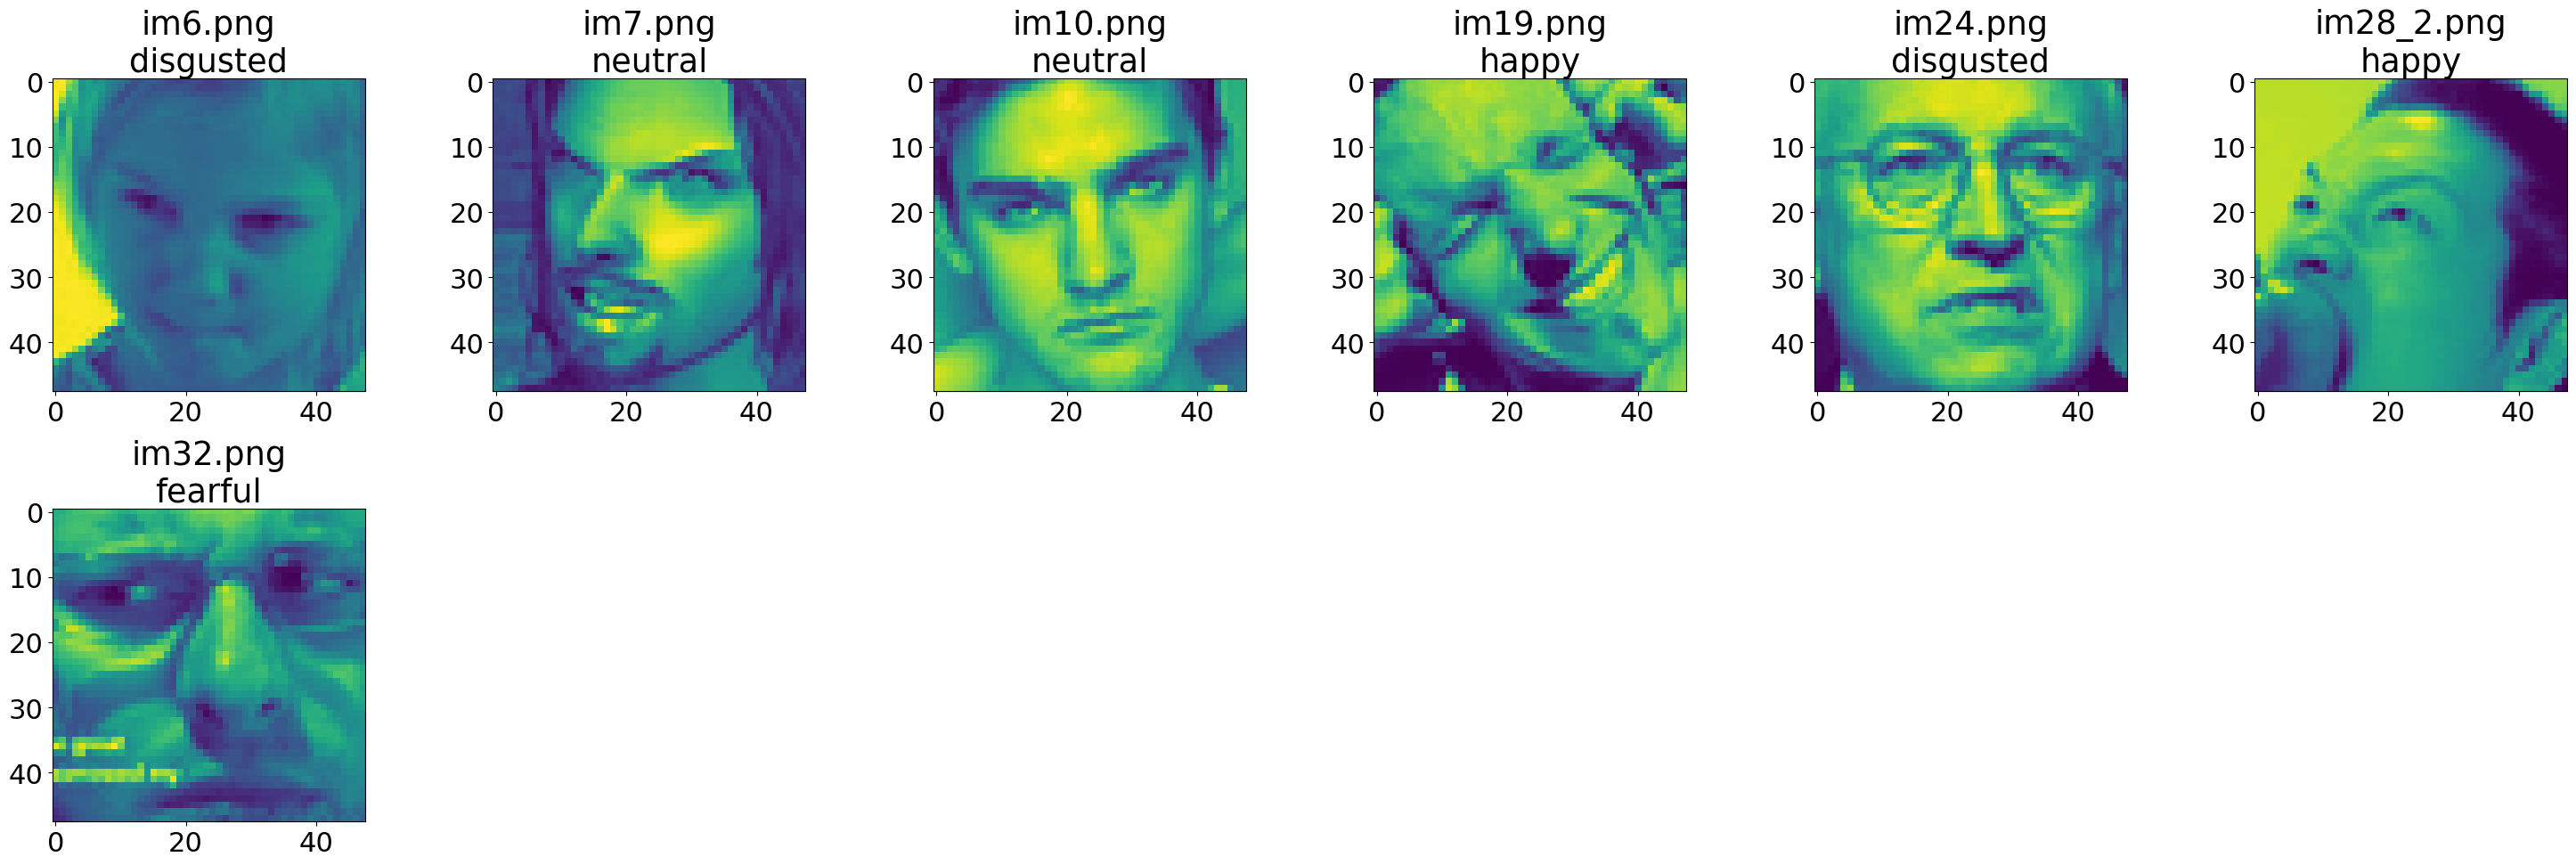



category: disgusted


  0%|          | 0/443 [00:00<?, ?it/s]

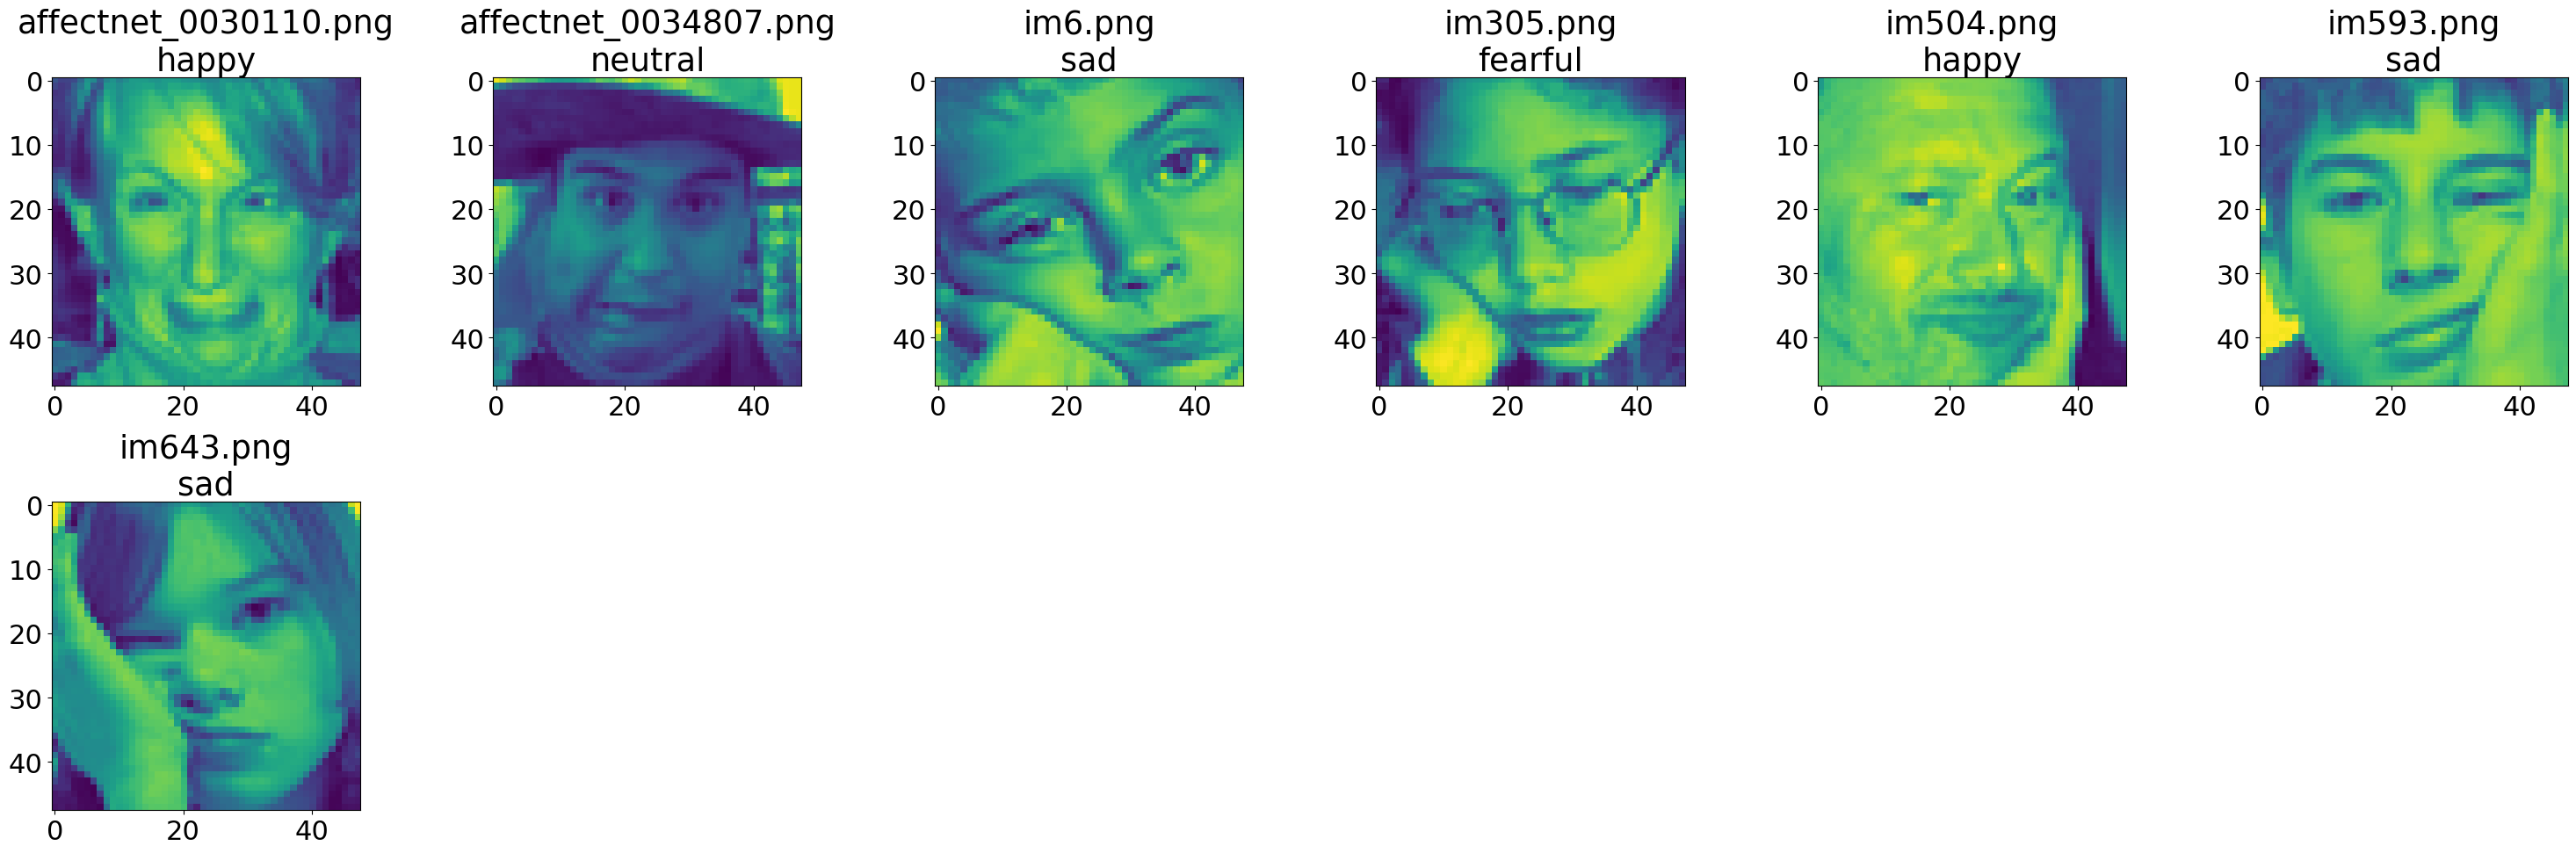



category: fearful


  0%|          | 0/653 [00:00<?, ?it/s]

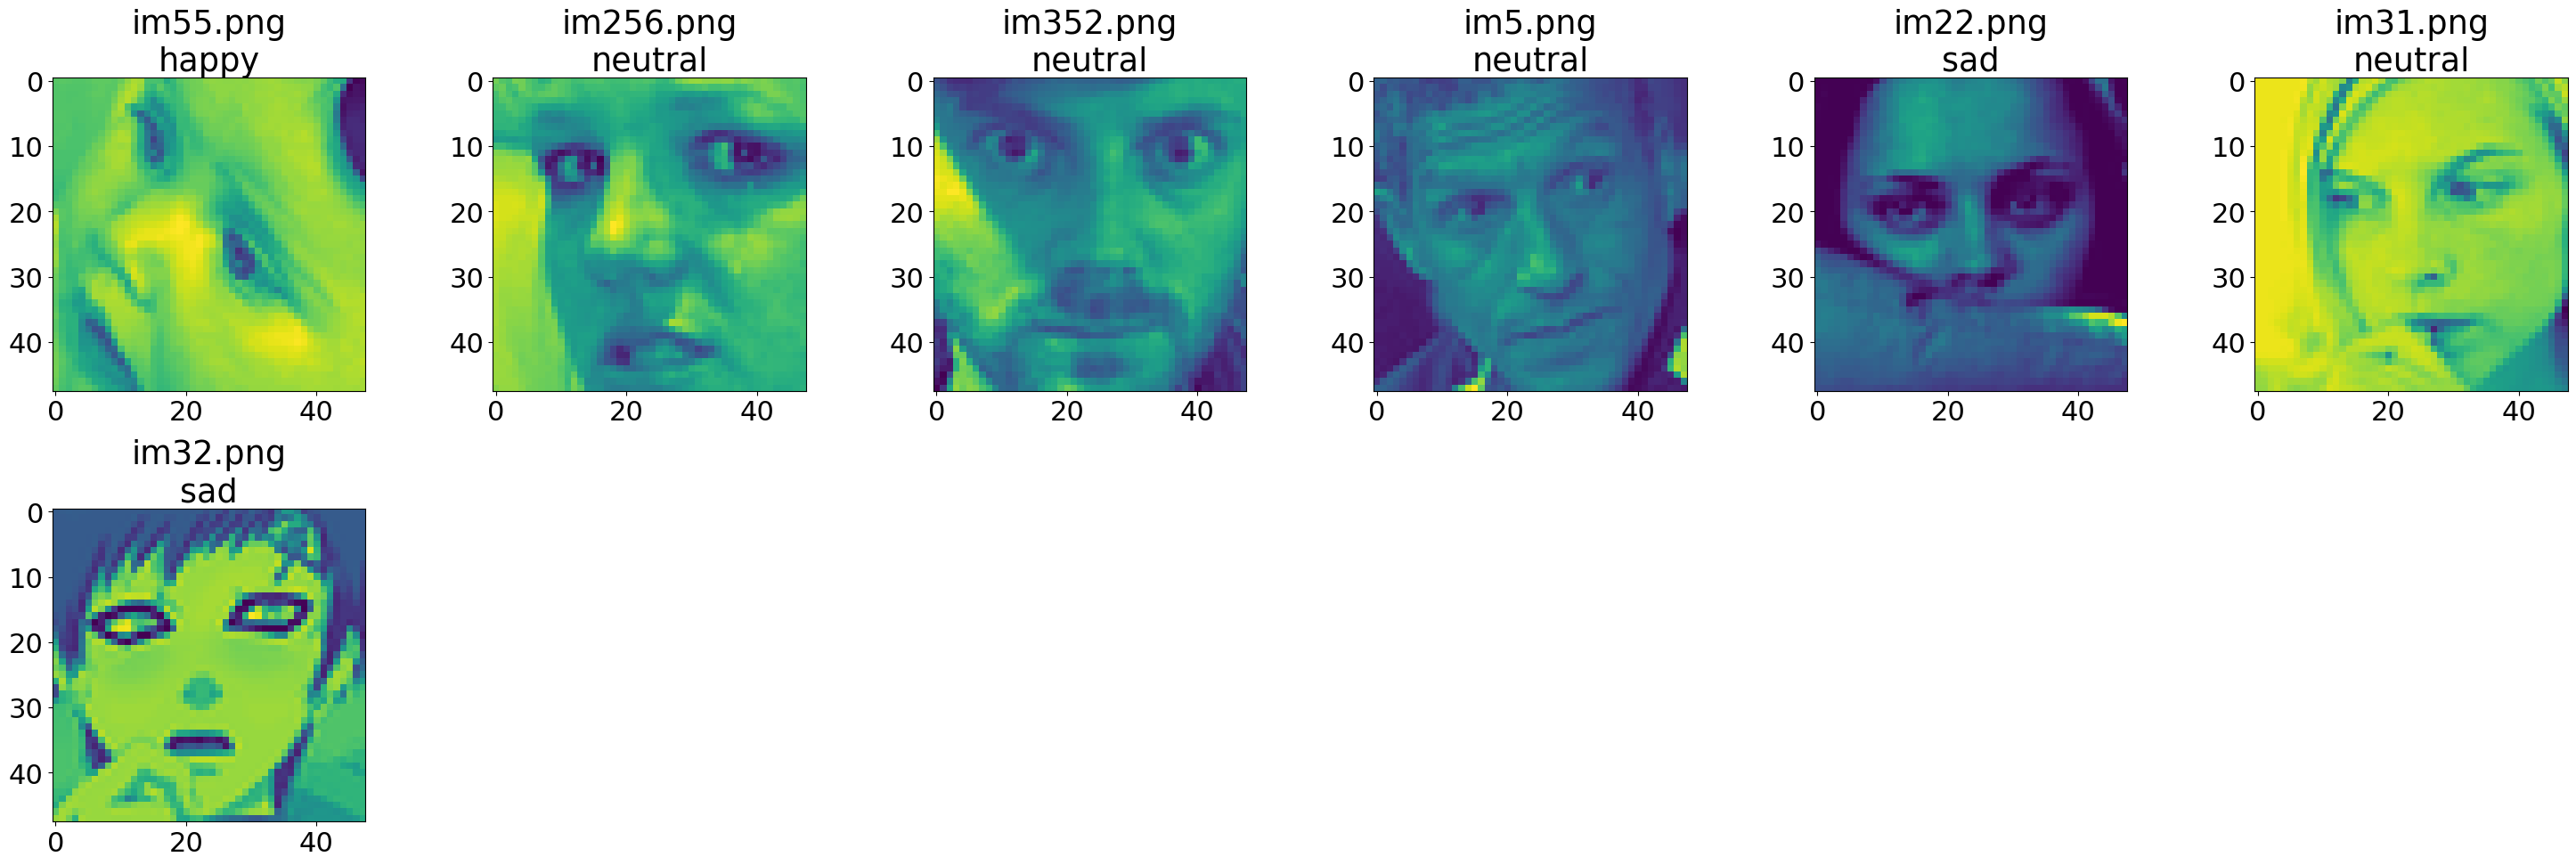



category: happy


  0%|          | 0/1802 [00:00<?, ?it/s]

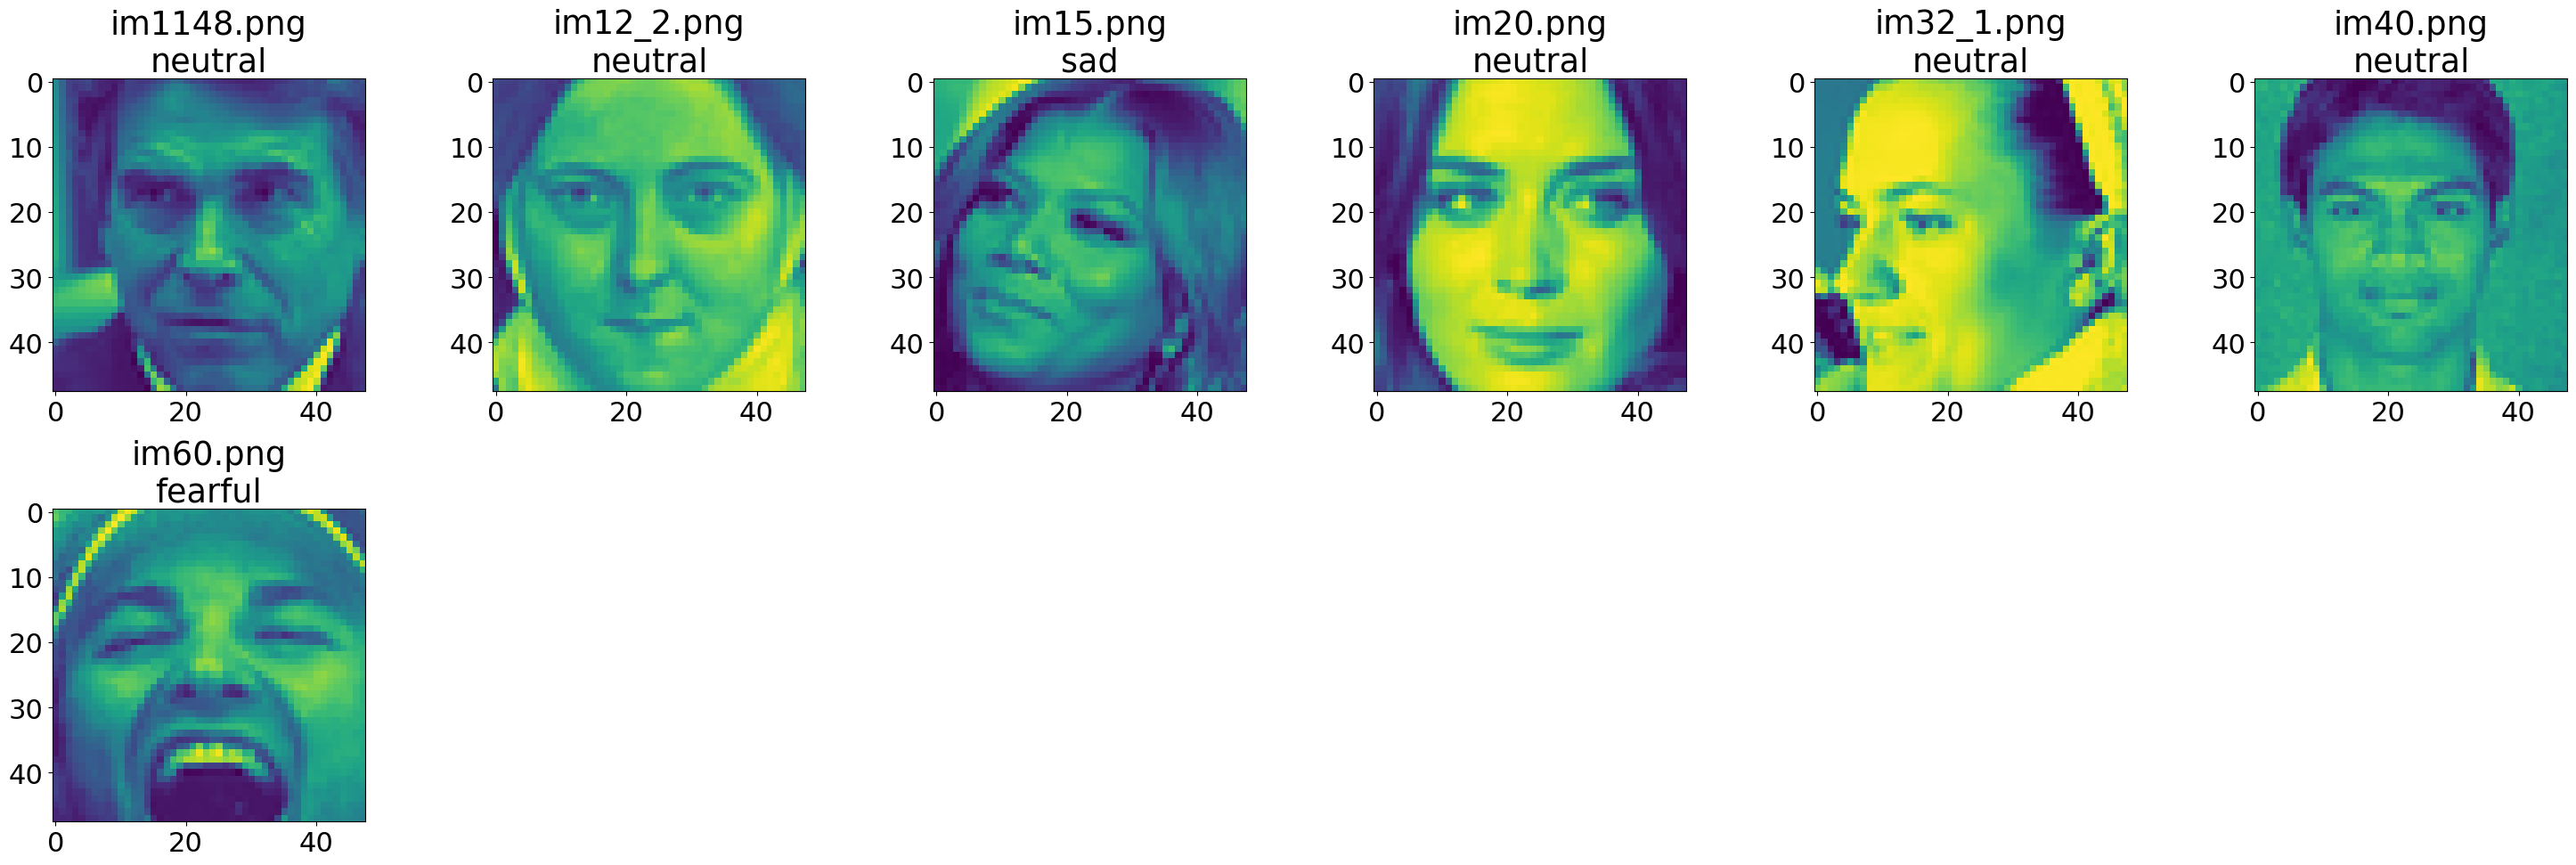



category: neutral


  0%|          | 0/1341 [00:00<?, ?it/s]

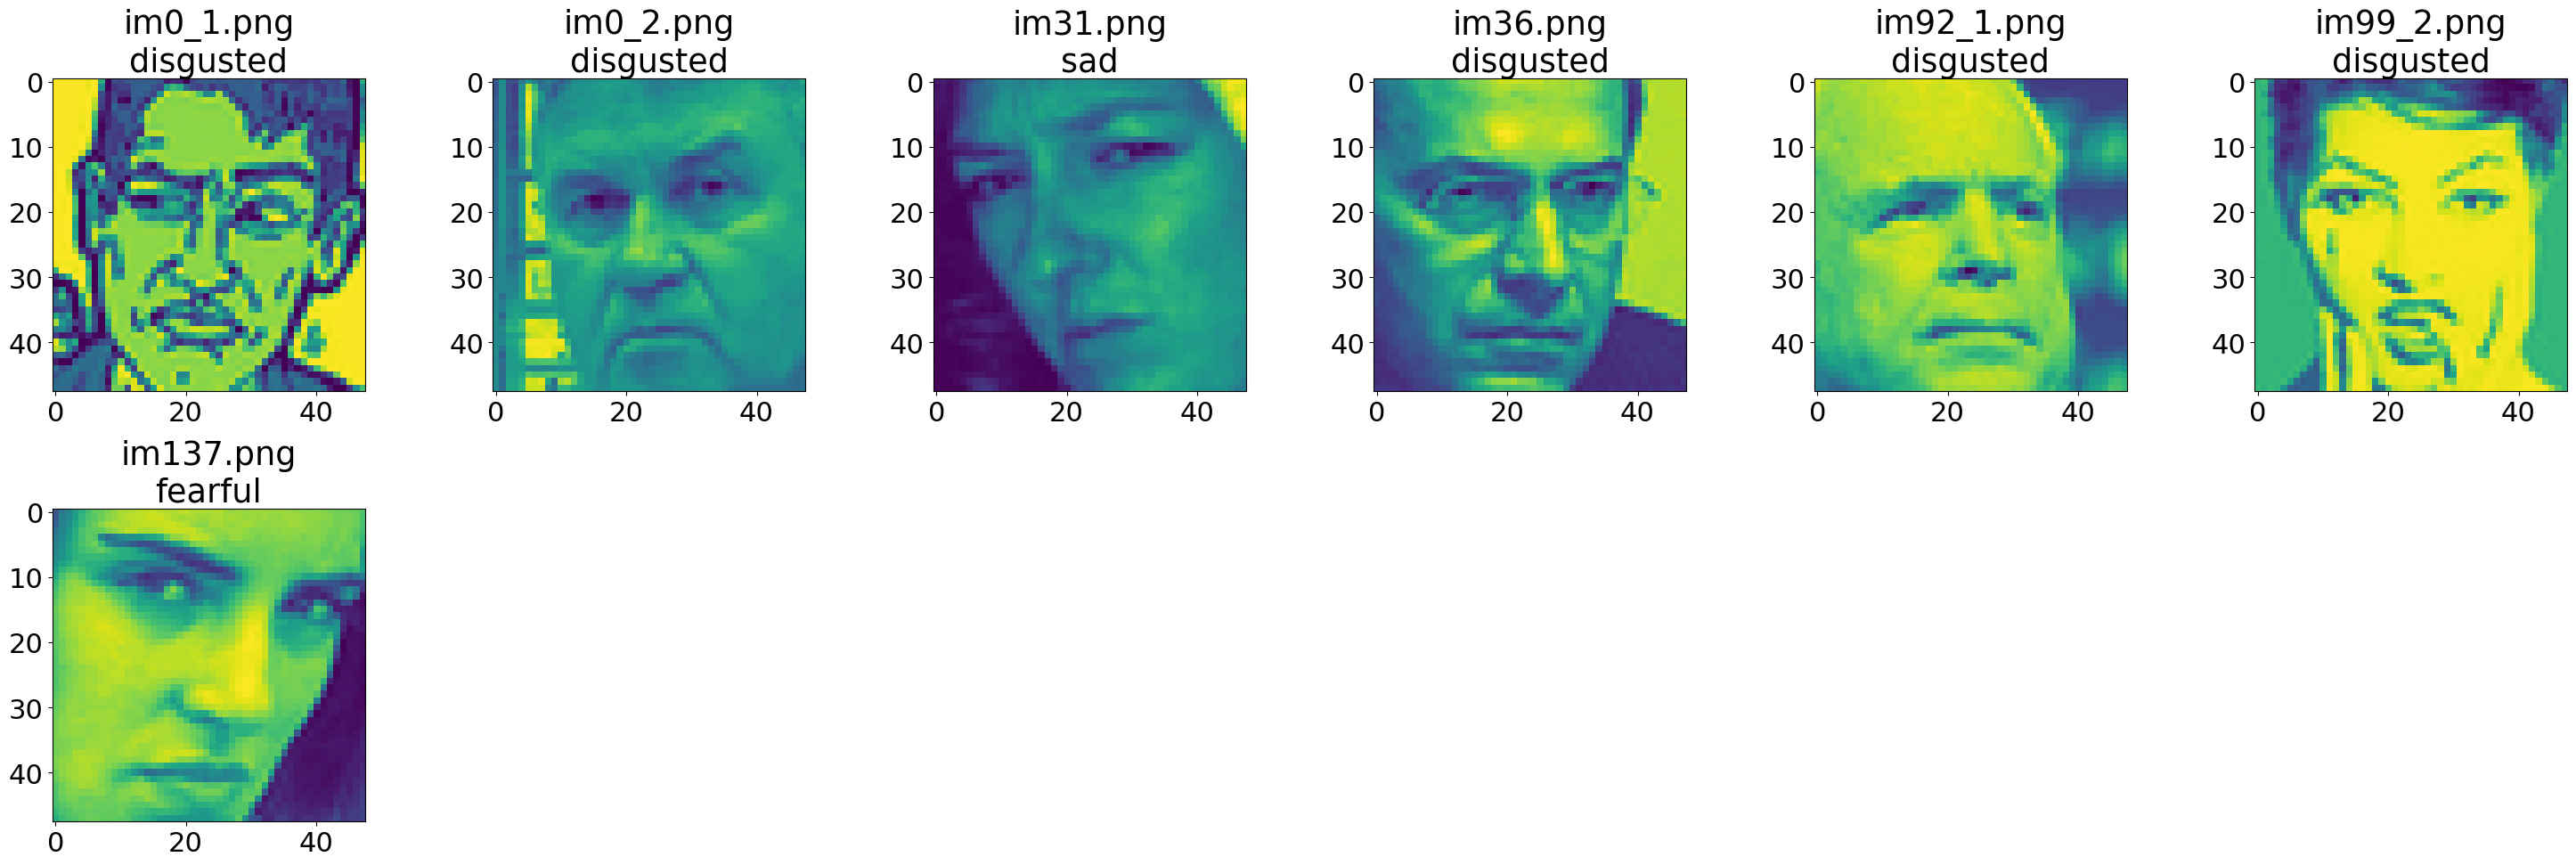



category: sad


  0%|          | 0/910 [00:00<?, ?it/s]

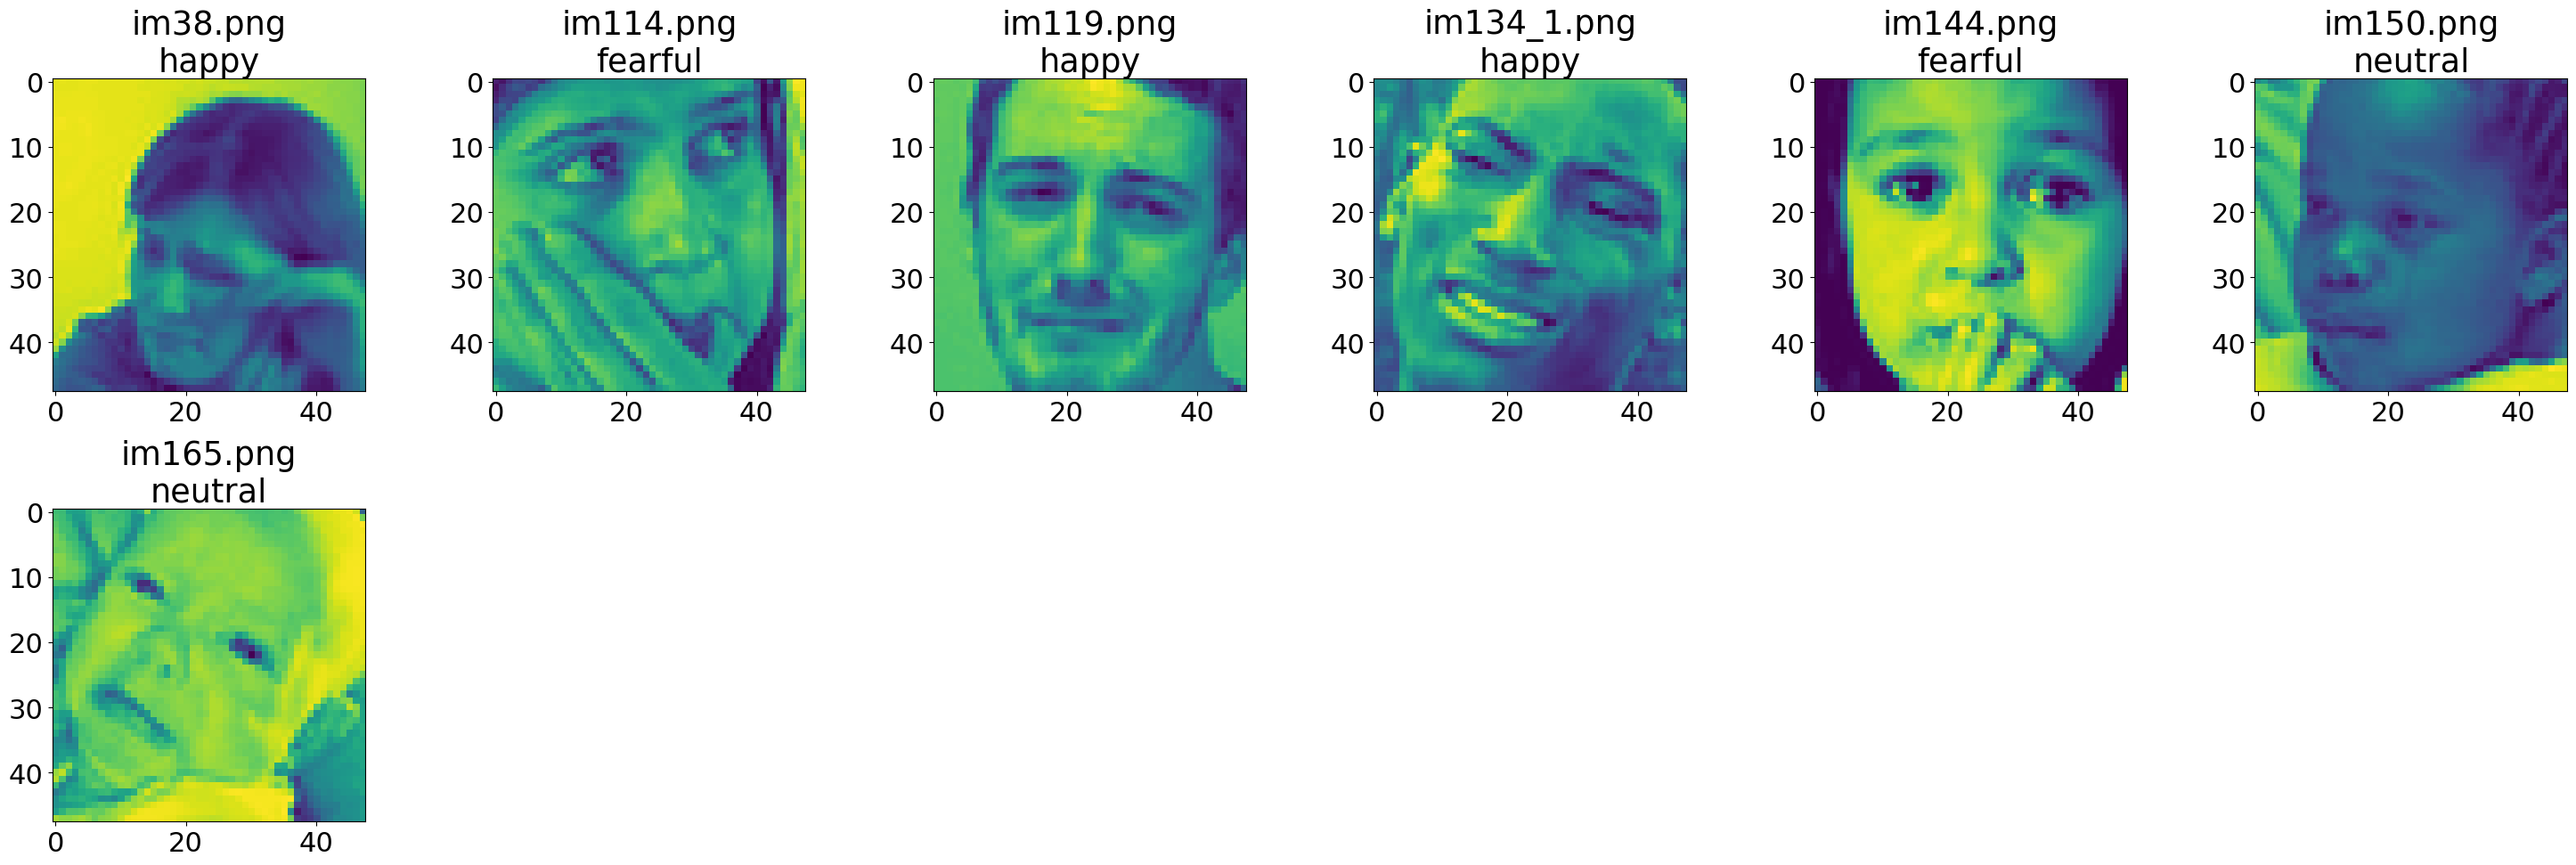



category: surprised


  0%|          | 0/928 [00:00<?, ?it/s]

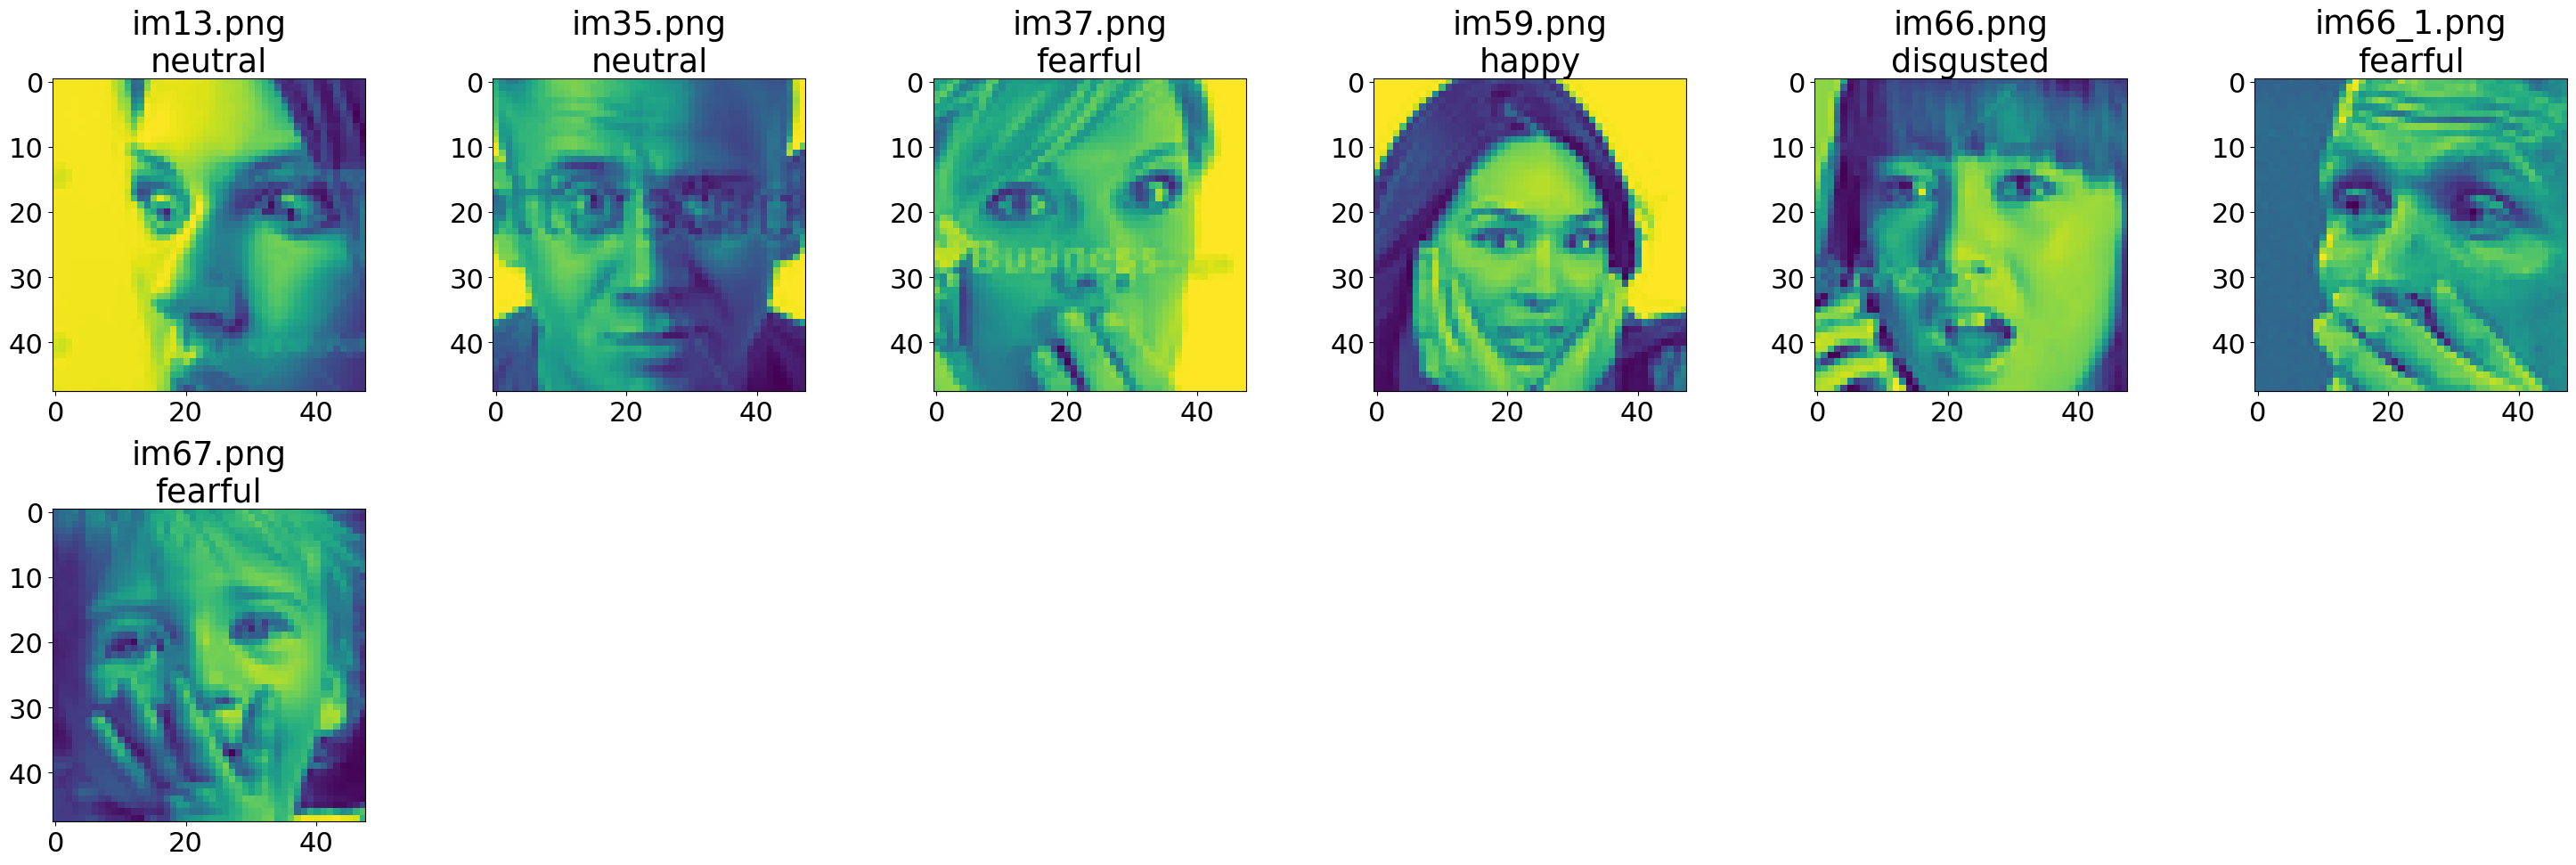

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math



nlin=0;
ncol=6;

for id in range(len(categories)):
    category=categories[id];
    counter=0;
    print('category:',category);
    basedir=os.path.join(dataset_base_dir,category);
    total_list=rnfunc.get_all_files_in_dir_list([basedir],formats_search=['.png']);
    
    L0=len(total_list);
    
    fname_list=[];
    ctg_list=[];
    
    #for n in range(L0):
    for n in TQDM(range(L0)):
        pil_img=load_img(total_list[n]);
        res=Clf.get_face_emotion_id_from_pil(pil_img);
        
        if res!=id:
            #print(total_list[n], categories[res]);
            fname_list.append(total_list[n]);
            ctg_list.append(categories[res]);
    
    Nerr=len(ctg_list);
    
    NerrShow=7;#Nerr;
    nlin=int(math.ceil(NerrShow*1.0/ncol));
    
    plt.figure(figsize=(ncol*5,nlin*5 ));
    plt.rcParams.update({'font.size': 22})
    
    k=1;
    for m in range(NerrShow):
        if m<Nerr:# if m<Nerr and ((ctg_list[m]=='neutral') or (categories[id]=='neutral')): # if m<Nerr:#
            plt.subplot(nlin,ncol, k);
            plt.imshow(mpimg.imread(fname_list[m]));
            plt.title(os.path.basename(fname_list[m])+'\n'+ctg_list[m]);
            k=k+1;
    
    plt.tight_layout()
    plt.show()
    
    print('\n')
    
    #for m in range(Nerr):
    #    print(fname_list[m],ctg_list[m]);
